<a href="https://colab.research.google.com/github/patison5/FAIntelligence/blob/main/%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Инициализация

In [1]:
import numpy as np
import scipy as sc
import sympy as sy
from matplotlib import pyplot as plt
from matplotlib import patheffects
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sympy.tensor.array import Array
import time
from sklearn.utils import shuffle
from tqdm.notebook import tqdm

### Создание тестовой функции из книги Пантелеева
Формула П.4, а также реализация функции нахождения частных производных и их числовых значений

In [2]:
def P4MultiSym():
    xs = [sy.Symbol('x'+str(i)) for i in range(2)]
    PI = sy.pi
    f = xs[0] * sy.sin(4 * PI * xs[0]) + xs[1] * sy.sin(4 * PI * xs[1])
    return f, xs

def P4Multi(x, y):
    ''' 
        Мультифункция (рис П.3)
        Глобальный экстремум Z = 837,9657 
    '''
    return x * np.sin(4 * np.pi * x) + y * np.sin(4 * np.pi * y)

def RosenSym():
  ''' 
      Функция Розенброка
      Глобальный экстремум Z = 1, 1
  '''
  xs = [sy.Symbol('x'+str(i)) for i in range(2)]
  f = 100*(xs[1] - xs[0]**2)**2 + (1 - xs[0])**2
  return f, xs

def RosenAlg(x, y):
    return 100*(y - x**2)**2 + (1 - x)**2

def get_fn_resultSingle(df, x0, xs):
    ''' 
        Вернуть числовой результат частных производных символьно заданной функции для одного параметра x, y
        df - массив частных производных функции
        x0 - массив входных данных [x, y]
    '''
    variables = [(xs[i], x0[i]) for i in range(len(xs))] # -> [(x0, 1.0), (x1, 2.0)]
    return np.double(df.subs(variables))

In [3]:
P4Multi(1,2)

-2.4492935982947065e-15

### Инициализация функции и ее параметров через sympy

In [13]:
f, xs = RosenSym()
f, xs

((1 - x0)**2 + 100*(-x0**2 + x1)**2, [x0, x1])

### Инициализация частных производных функции

In [14]:
df = Array([sy.diff(f, x) for x in xs]) # Частные производные символьно заданной функции f
print(df[0])
print(df[1])

-400*x0*(-x0**2 + x1) + 2*x0 - 2
-200*x0**2 + 200*x1


### Реализация градиентного спуска с изменчивым learning_rate

In [1]:
def grad_descent(f, z0, with_history=False, lr=1e-2, eps=1e-06): 
    ''' 
        Градиентный спуск для символьно заданной ф-ии
        f - функция
        z0 - исходный массив точек X,Y
        with_history - результат вернется вместе с промежуточными расчетами
        lr - learning rate
        eps - критерий остановки перебора epsilon 
    '''
    history = []
    
    idx = 1
    while True:
        lr = 0.1 / min((1 + idx), 10)
        idx+=1
        
        z0 = z0 - lr * get_fn_resultSingle(df, z0, xs)
        history.append(z0)
        norm = np.linalg.norm(get_fn_resultSingle(df, z0, xs))
        if norm < eps:
            break
        
    # Если нужно вернуть с историей
    if with_history:
        return np.array(history), z0
    else:
        return z0

In [9]:
start_time = time.time()
history, best = grad_descent(f, np.array([1., 2.]), True)
print("Время выполнения алгоритма %s sec " % (time.time() - start_time))
print("Точка минимума:", best, "\n")

Время выполнения алгоритма 0.7415988445281982 sec 
Точка минимума: [0.39097848 0.88215911] 



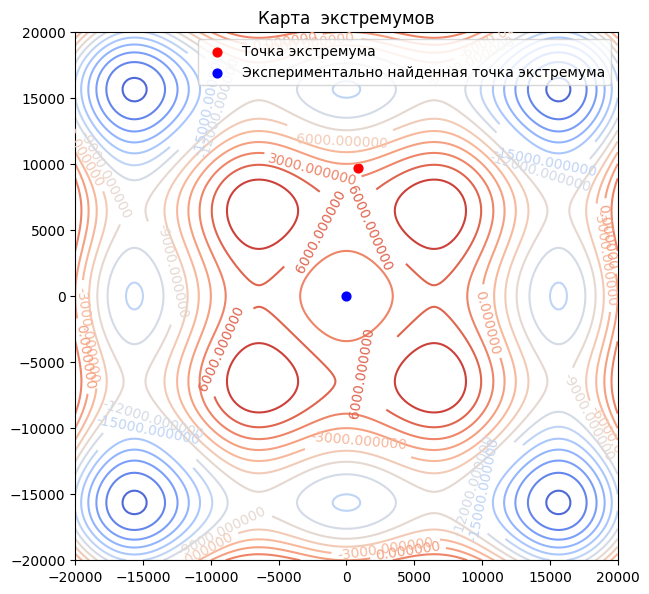

In [83]:
fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
        
p4XRange = np.linspace(-20000, 20000, 200)
p4YRange = np.linspace(-20000, 20000, 200)
p4X, p4Y = np.meshgrid(p4XRange, p4YRange)


CS = ax.contour(*np.meshgrid(p4XRange, p4YRange), 
                P4Multi(p4X, p4Y),
                levels = 15,
                cmap=cm.coolwarm)

ax.clabel(CS, fmt="%1f", use_clabeltext=True)

ax.scatter(837, 9657, c='red', s=40, label="Точка экстремума")
ax.scatter(best[0],best[1], c='blue', s=40, label="Экспериментально найденная точка экстремума",)
ax.set_title("Карта  экстремумов")

plt.legend()
plt.show()